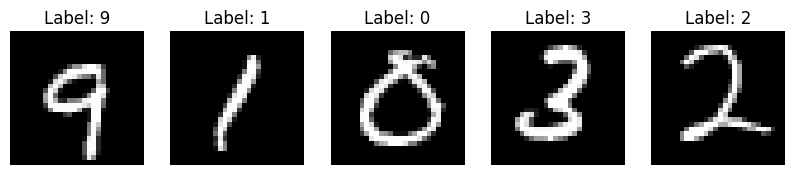

실제 레이블: [9, 1, 0, 3, 2]
예측된 레이블: [9, 1, 0, 3, 2]


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# MPS 디바이스 설정 (Mac GPU 사용)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# 데이터 로딩
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# CNN 모델 정의
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 14 * 14, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 14 * 14)
        x = self.fc1(x)
        return x

# 모델 초기화 및 디바이스 이동
model = BasicCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
for epoch in range(3):
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)  # 데이터를 GPU로 이동
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 샘플 데이터 5개 확인
def show_sample_images():
    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    # 5개 이미지 출력 (CPU로 이동하여 시각화)
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i in range(5):
        axes[i].imshow(images[i].squeeze().cpu(), cmap='gray')  # GPU 데이터를 CPU로 이동
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis('off')
    plt.show()

    # 모델 예측값 출력
    model.eval()
    with torch.no_grad():
        images = images.to(device)  # 이미지를 GPU로 이동
        outputs = model(images[:5])
        _, predicted = torch.max(outputs.cpu(), 1)  # 결과를 CPU로 이동하여 처리

    print(f"실제 레이블: {labels[:5].tolist()}")
    print(f"예측된 레이블: {predicted.tolist()}")

# 샘플 확인 실행
show_sample_images()
